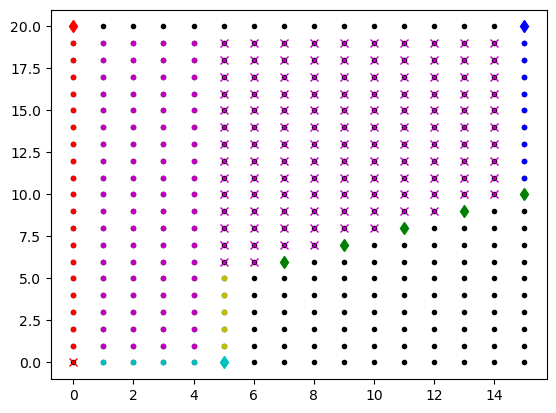

In [36]:
#  Este código es útil para resolver la ecuación de laplace con condiciones de dirichlet y neumman
import numpy as np
import matplotlib.pyplot as plt
# Figura a resolver
dx = dy = 1
Lx = 15
Ly = 20
Nx = int(Lx/dx + 1) # nodos en x
Ny = int(Ly/dy + 1) # nodos en y

x = np.linspace(0,Lx,Nx)
y = np.linspace(0,Ly,Ny)

# Malla de puntos
X,Y = np.meshgrid(x,y)

plt.plot(X,Y,'.k')

for i in range(Nx):
    for j in range(Ny):
        if i == 0 and j!=0 and j!=Ny-1:
            plt.plot(X[j,i],Y[j,i],'.r')
        elif i == 0 and j==0:
             plt.plot(X[j,i],Y[j,i],'xr')
        elif i == 0 and j==Ny-1:
             plt.plot(X[j,i],Y[j,i],'dr')
        elif j==0 and i>0 and i < 5/dx:
            plt.plot(X[j,i],Y[j,i],'.c')
        elif j==0 and i == 5/dx:
            plt.plot(X[j,i],Y[j,i],'dc')
        elif i == Nx-1 and j == Ny-1:
            plt.plot(X[j,i],Y[j,i],'db')
        elif i == Nx-1 and j > 10/dy and j < Ny-1:
            plt.plot(X[j,i],Y[j,i],'.b')
        elif i == 5/dx and j > 0 and j <= 5/dy:
            plt.plot(X[j,i],Y[j,i],'.y')
        elif j == (i-5/dx)*dx/(2*dy)+5/dy and i > 5/dx:
            plt.plot(X[j,i],Y[j,i],'dg') 
        elif i > 0 and i < 5/dx and j != Ny-1:
            plt.plot(X[j,i],Y[j,i],'.m')
        elif i >= 5/dx and i < Nx-1 and j > (i-5/dx)*dx/(2*dy)+5/dy and j < Ny-1:
            plt.plot(X[j,i],Y[j,i],'xm')

In [25]:
Nx

7